In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv")


In [3]:
data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [4]:
data['VIN (1-10)'] = pd.to_numeric(data['VIN (1-10)'],errors='coerce')
data['County'] = pd.to_numeric(data['County'],errors='coerce')
data['City'] = pd.to_numeric(data['City'],errors='coerce')
data['State'] = pd.to_numeric(data['State'],errors='coerce')
data['Make'] = pd.to_numeric(data['Make'],errors='coerce')
data['Model'] = pd.to_numeric(data['Model'],errors='coerce')
data['Electric Vehicle Type'] = pd.to_numeric(data['Electric Vehicle Type'],errors='coerce')
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = pd.to_numeric(data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'],errors='coerce')
data['Vehicle Location'] = pd.to_numeric(data['Vehicle Location'],errors='coerce')
data['Electric Utility'] = pd.to_numeric(data['Electric Utility'],errors='coerce')



In [5]:
data = data.fillna(0).astype(np.int64, errors = 'ignore')


In [6]:
data.dtypes


VIN (1-10)                                           int64
County                                               int64
City                                                 int64
State                                                int64
Postal Code                                          int64
Model Year                                           int64
Make                                                 int64
Model                                                int64
Electric Vehicle Type                                int64
Clean Alternative Fuel Vehicle (CAFV) Eligibility    int64
Electric Range                                       int64
Base MSRP                                            int64
Legislative District                                 int64
DOL Vehicle ID                                       int64
Vehicle Location                                     int64
Electric Utility                                     int64
2020 Census Tract                                    int

In [7]:
x = data.drop('Electric Utility', axis=1)
y = data['Electric Utility']


In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y_encoded = LabelEncoder().fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [10]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_categorical, test_size=0.2, random_state=42)

# Reshape data for LSTM input
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))


In [11]:
model = Sequential()
model.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(y_categorical.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
ev = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test), verbose=1)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


3118/3118 [==============================] - 13s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
3118/3118 [==============================] - 12s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
3118/3118 [==============================] - 11s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
3118/3118 [==============================] - 10s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
3118/3118 [==============================] - 13s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
3118/3118 [==============================] - 11s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
3118/3118 [==============================] - 11s 4ms/step - loss: 0.0000e+00 - acc

In [13]:
score, acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', acc)


Test accuracy: 1.0


In [30]:
from sklearn.metrics import confusion_matrix

# Predict probabilities on the test set
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)



780/780 [==============================] - 1s 2ms/step
Confusion matrix

 [[    0     0]
 [24944     0]]


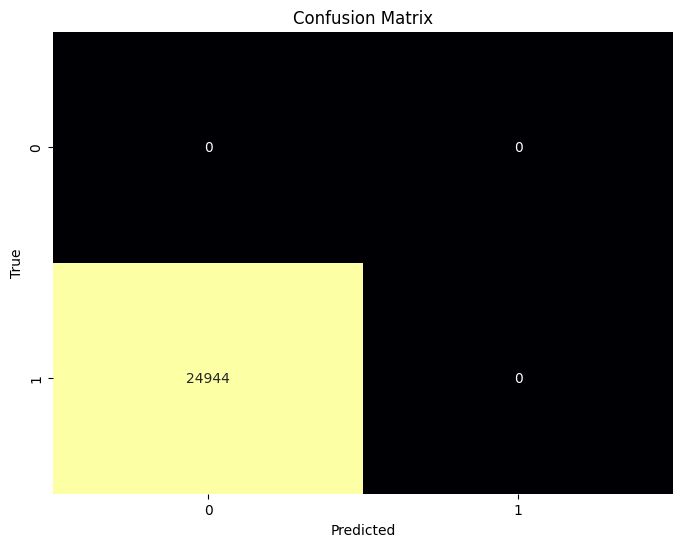

In [25]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='plasma', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [27]:
# Generate a classification report
from sklearn.metrics import classification_report
clr = print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00   24944.0

    accuracy                           0.00   24944.0
   macro avg       0.00      0.00      0.00   24944.0
weighted avg       0.00      0.00      0.00   24944.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

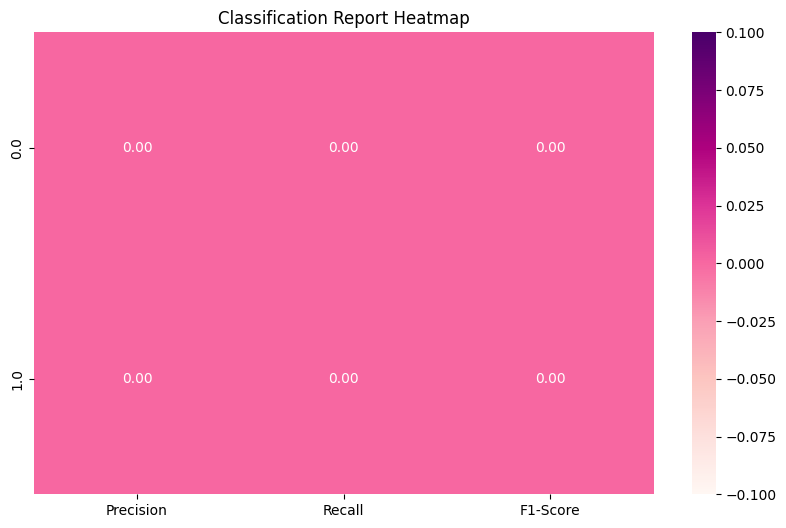

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'],
                 class_report[class_name]['f1-score']] for class_name in class_names]

    # Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=class_names, cmap='RdPu')
plt.title('Classification Report Heatmap')
plt.show()
